# Task 1:

## Create a BoW representation of a small corpus using sklearn CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# corpus
sentences = [
    'India is the 7th largest company in the world.',
    'Apple is my favourite fruit.',
    'I love playing FIFA24',
    'Currently I am pursuing my MTech degree.',
    'I am 24 years old.'
]

In [ ]:
# initialize CountVectorizer
vectorizer = CountVectorizer()

In [ ]:
# fit and transform the corpus into Bag of Words representation
X = vectorizer.fit_transform(sentences)

In [ ]:
# get feature names
feature_names = vectorizer.get_feature_names_out()
print(feature_names)

['24' '7th' 'am' 'apple' 'company' 'currently' 'degree' 'favourite'
 'fifa24' 'fruit' 'in' 'india' 'is' 'largest' 'love' 'mtech' 'my' 'old'
 'playing' 'pursuing' 'the' 'world' 'years']


In [ ]:
# convert sparse matrix to array
bow_representation = X.toarray()
print(bow_representation)

[[0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 2 1 0]
 [0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0]
 [0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0]
 [1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1]]


In [ ]:
# Print results
print("Vocabulary:", feature_names)
print("\nBag of Words Representation:")
for i, sentence in enumerate(sentences):
    print(f"{sentence} → {bow_representation[i]}")

Vocabulary: ['24' '7th' 'am' 'apple' 'company' 'currently' 'degree' 'favourite'
 'fifa24' 'fruit' 'in' 'india' 'is' 'largest' 'love' 'mtech' 'my' 'old'
 'playing' 'pursuing' 'the' 'world' 'years']

Bag of Words Representation:
India is the 7th largest company in the world. → [0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 2 1 0]
Apple is my favourite fruit. → [0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0]
I love playing FIFA24 → [0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0]
Currently I am pursuing my MTech degree. → [0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0]
I am 24 years old. → [1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1]


# Task 2:

## Calculate TF-IDF scores for a set of documents and visualize the top terms.




In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

In [11]:
# documents
documents = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?",
    "India is the 7th largest company in the world.",
    "Apple is my favourite fruit.",
    "I love playing FIFA24",
    "Currently I am pursuing my MTech degree.",
    "I am 24 years old."
]

In [12]:
# initialize and fit TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=10, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(documents)

In [13]:
# get feature names and score
feature_names = vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

In [14]:
# find top terms for each document
top_n = 5
top_terms = {}

for i, row in tfidf_df.iterrows():
    top_words = row.sort_values(ascending=False).head(top_n)
    top_terms[f"Document {i+1}"] = list(top_words.index)

<ipython-input-15-23367643cefa>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_tfidf.values, y=avg_tfidf.index, palette="viridis")


Text(0.5, 1.0, 'Average TF-IDF Scores for Each Term')

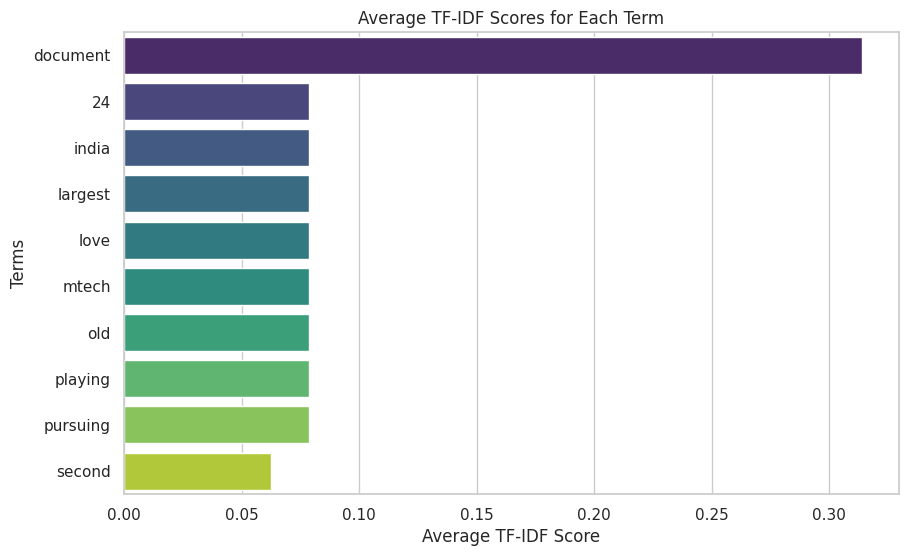

In [15]:
# visualize using bar plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

avg_tfidf = tfidf_df.mean()
avg_tfidf.sort_values(ascending=False, inplace=True)

sns.barplot(x=avg_tfidf.values, y=avg_tfidf.index, palette="viridis")
plt.ylabel("Terms")
plt.xlabel("Average TF-IDF Score")
plt.title("Average TF-IDF Scores for Each Term")

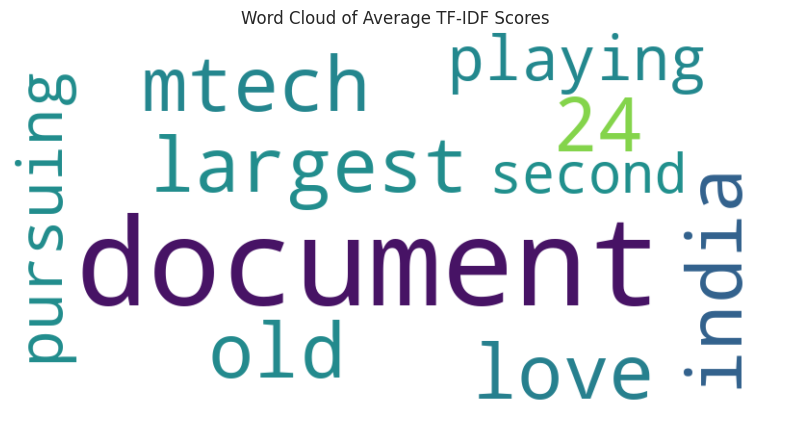

In [16]:
# word cloud visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(avg_tfidf)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Average TF-IDF Scores")
plt.show()

# Task 3:

## Use genism to train a Word2Vec model on a text file and find similar words

In [17]:
import gensim
import gensim.models
from gensim.models import Word2Vec
import re

In [18]:
# load and preprocess text file
def preprocess_text(file_path):

  with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read().lower()

  text = re.sub(r'[^a-z\s]', '', text)
  sentences = [sentence.split() for sentence in text.split('\n') if sentence]
  return sentences

In [19]:
# provide your text file path
file_path = "/content/The Lost Puppy and the Kind Strange.txt"
sentences = preprocess_text(file_path)

In [21]:
# train Word2Vec model
model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4)

In [22]:
# save the model
model.save("word2vec_model.model")

In [23]:
# load the model
model = Word2Vec.load("word2vec_model.model")

In [31]:
# find similar words
word = "ravi"
if word in model.wv:
  similar_words = model.wv.most_similar(word, topn=5)
  print(f"Similar words to '{word}':")

  for word, score in similar_words:
    print(f"{word}: {score}")
else:
  print(f"'{word}' not found in the vocabulary.")

Similar words to 'ravi':
for: 0.25558993220329285
from: 0.20240992307662964
puppy: 0.17301148176193237
around: 0.1528100222349167
he: 0.14082489907741547
